In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DataFrame Shape (731, 18)
Year                   0.500684
Month                  6.519836
Holiday                0.028728
Working_day            0.683995
Temperature            0.495385
FeelTemp               0.474354
Humidity               0.627894
Wind_speed             0.190486
Casual_users         848.176471
Registered_users    3656.172367
Total_users         4504.348837
Average_Temp           0.484869
Casual_ratio           0.175598
Registered_ratio       0.824402
dtype: float64


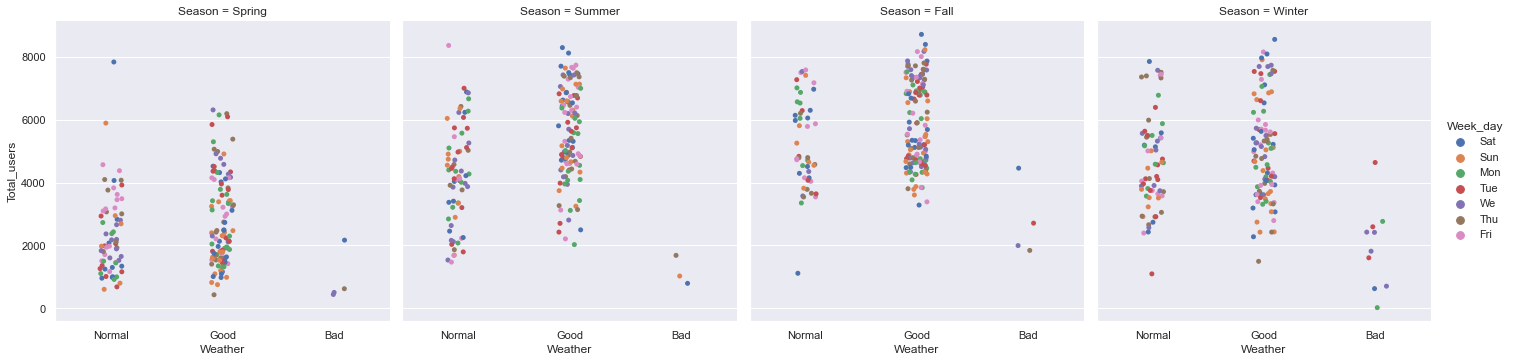

In [50]:
def load_and_process(url_or_path_to_csv_file):

    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .rename(columns = {"instant":"Index", "dteday":"Date","season":"Season","yr":"Year","mnth":"Month","hr":"Hour","holiday":"Holiday","weekday":"Week_day","workingday":"Working_day",
                            "weathersit":"Weather","temp":"Temperature","atemp":"FeelTemp","hum":"Humidity","windspeed":"Wind_speed","casual":"Casual_users","registered":"Registered_users",
                            "cnt": "Total_users"}, errors = "ignore")
        .sort_values(["Index", "Date"])
        .fillna("Data N/A")
        .drop(columns = "Index", errors = "ignore")

      )

    df2 = (
        df1
        .assign(Average_Temp = lambda x : (x['FeelTemp'] + x['Temperature']) / 2)
        .assign(Casual_ratio = lambda x : x['Casual_users'] / x['Total_users'])
        .assign(Registered_ratio = lambda x : x['Registered_users'] / x['Total_users'])
      )

    # Replace weather conditions in column weather
    df2['Weather'] = df2['Weather'].replace([1,2,3,4],["Good","Normal","Bad","Severe"])
    # Replace season in column season
    df2['Season'] = df2['Season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
    # Replace weekday in column week_day
    df2['Week_day'] = df2['Week_day'].replace([0,1,2,3,4,5,6],["Sun","Mon","Tue","We","Thu","Fri","Sat"])
    
    df2.groupby(['Total_users','Average_Temp'])
    print ("DataFrame Shape", df2.shape)
    print (df2.mean(axis = 0, numeric_only=None))
      
    return df2

In [ ]:
def Graph1(df):
    graph = sns.catplot(x="Weather", y="Total_users", hue="Week_day", col="Season", data=df)
    sns.set_theme(style="dark")  